In [66]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt #for scatter
import random
import pandas as pd



Automatically created module for IPython interactive environment


In [67]:
!pip install yellowbrick

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [68]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

In [69]:
df = pd.read_csv('fifa20.csv')
data = pd.DataFrame()
data['overall']=df['overall']
data['wage_eur'] = df['wage_eur']

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000276ED08AA20>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

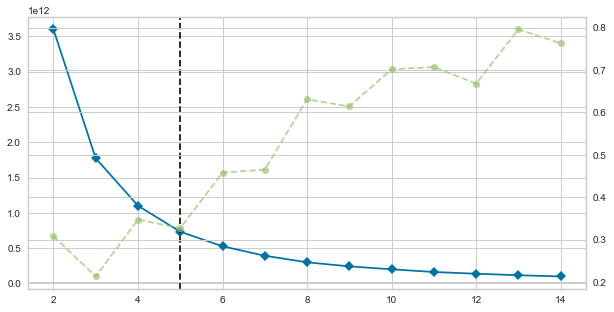

In [70]:
visualizer.fit(data)

In [102]:
# inisiasi k centroid dari dataset X
def init_centroid(X,k):
    n_sample= X.shape[0]
    point = random.sample(range(0, n_sample), k)
    centroid=[]
    for i in range(k):
        centroid.append(X[point[i]][:])
        
    return np.array(centroid)

In [103]:
def euc_distance(mtxA, mtxB):
    A_square = np.reshape(np.sum(mtxA * mtxA, axis=1), (mtxA.shape[0], 1))
    B_square = np.reshape(np.sum(mtxB * mtxB, axis=1), (mtxB.shape[0]), 1)
    AB = mtxA @ mtxB.T
    return np.sqrt(-2 * AB + B_square + A_square)
    

In [104]:
def get_cluster(X, cent, distance_method):
    k = cent.shape[0]
    cluster ={}
    dist_matrix = distance_method(X, cent)    
    closest_cluster_ids = np.argmin(dist_matrix, axis=1)

    for i in range(k):
        cluster[i] = []
    for i, cluster_id in enumerate(closest_cluster_ids):
        cluster[cluster_id].append(X[i])
        
    return cluster
    

In [105]:
def cover_centroid(prev_cent, new_cent, dist_method, move_threshold):
    dist_prev_vs_new = dist_method(prev_cent, new_cent)
    covered_cent = np.max(dist_prev_vs_new.diagonal()) <= move_threshold
    
    return covered_cent

In [106]:
def kmeans(X, k, dist_method, move_threshold):
    new_cent = init_centroid(X=X, k=k)
    centroids_covered = False
    
    while not centroids_covered:
        prev_cent = new_cent
        clusters = get_cluster(X, prev_cent, dist_method)
        
        new_cent = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype)
                                  for key in sorted(clusters.keys())])
        centroids_covered = cover_centroid(prev_cent, new_cent, dist_method, move_threshold)
    return new_cent

<function matplotlib.pyplot.show(*args, **kw)>

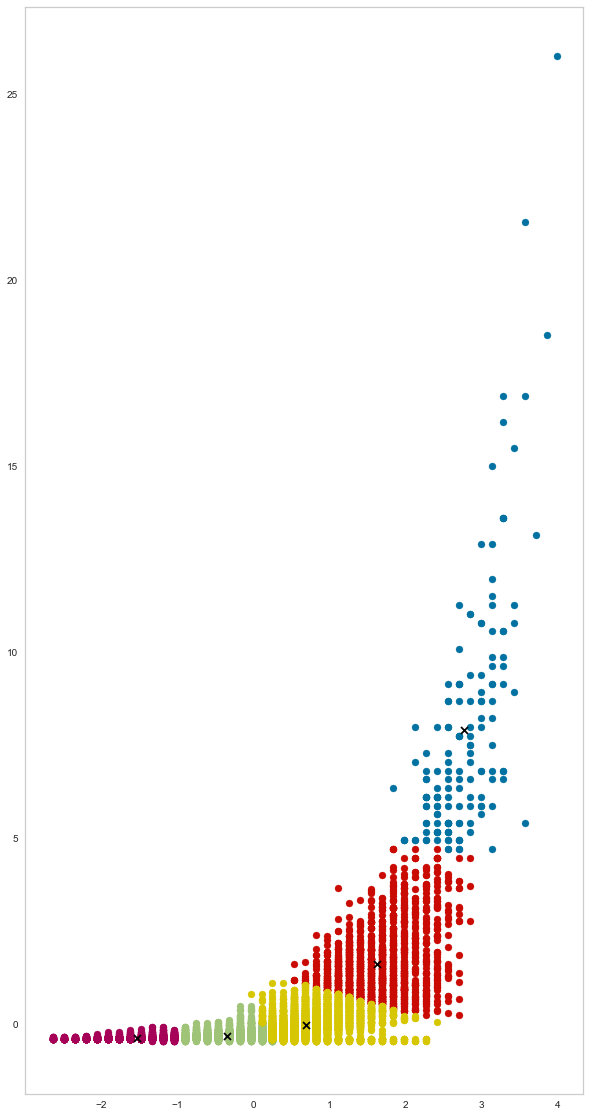

In [112]:

from sklearn.preprocessing import StandardScaler
dum = np.array(data)
scal = StandardScaler()
scal_x = scal.fit_transform(dum)
centroids = kmeans(scal_x, k=5, dist_method=euc_distance, move_threshold=0.0001)
clusters = get_cluster(scal_x, centroids, euc_distance)

plt.rcParams['figure.figsize'] = [10, 20]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)
    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="black")
plt.show    


In [113]:
points


array([[ 2.4108744 ,  0.07227052],
       [ 2.2669846 , -0.39608877],
       [ 2.2669846 , -0.39608877],
       ...,
       [ 0.10863766,  0.40012202],
       [ 0.10863766,  0.07227052],
       [-0.03525213,  0.82164538]])

In [114]:
centroids

array([[ 2.76636684e+00,  7.91713550e+00],
       [-3.40318171e-01, -3.24825268e-01],
       [ 1.63027945e+00,  1.61138849e+00],
       [-1.52529899e+00, -3.75710139e-01],
       [ 6.96102677e-01, -7.71416231e-03]])

In [115]:
clusters

{0: [array([ 3.99366216, 26.01937495]),
  array([ 3.84977236, 18.52562638]),
  array([ 3.70588256, 13.13949459]),
  array([3.56199277, 5.41156638]),
  array([ 3.56199277, 21.56996174]),
  array([ 3.56199277, 16.88636888]),
  array([ 3.41810297, 11.26605745]),
  array([3.41810297, 8.92426102]),
  array([ 3.41810297, 15.48129102]),
  array([ 3.41810297, 10.79769816]),
  array([3.27421318, 6.81664423]),
  array([3.27421318, 6.58246459]),
  array([3.27421318, 9.86097959]),
  array([3.27421318, 6.81664423]),
  array([3.27421318, 9.15844066]),
  array([ 3.27421318, 10.56351852]),
  array([3.27421318, 9.62679995]),
  array([ 3.27421318, 13.60785388]),
  array([ 3.27421318, 13.60785388]),
  array([ 3.27421318, 16.18382995]),
  array([ 3.27421318, 10.56351852]),
  array([ 3.27421318, 13.60785388]),
  array([ 3.27421318, 16.88636888]),
  array([3.13032338, 9.62679995]),
  array([ 3.13032338, 11.26605745]),
  array([3.13032338, 8.22172209]),
  array([ 3.13032338, 11.50023709]),
  array([3.1303233